![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
# Gráfica del salario, años y hits
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [6]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


### Concluciones
- Hay mas alquiler medio de bicicletas los dias laborales (1) que en los dias feriados (0)
- Es de notar que al menos hay un (1) alquiler en una hora
- El maximo de alquileres se encuentra en los dias laborales (1) con 977
- La distribucion entre cuartiles es muy similar entre ambas clases (dia laboral y dia festivo), sin embargo el 3er cuartil es mayor para los dias festivos

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
r=bikes.groupby('hour').total.describe()
r.sort_values(by=['mean','hour'],ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
17,456.0,468.765351,223.775485,15.0,277.00,480.5,608.5,970.0
18,456.0,430.859649,219.908138,23.0,240.75,422.5,564.0,977.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.5,839.0
16,456.0,316.372807,145.664786,11.0,211.75,309.5,421.0,783.0
19,456.0,315.278509,156.641732,11.0,190.00,312.5,416.0,743.0


### Concluciones
- Hay mayor moviemiento en el alquiler de las biciletas en terminando la tarde
- Las 8 de la mañana es la hora con mayor registro de alquiler que cualuier otra hora en la mañana

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

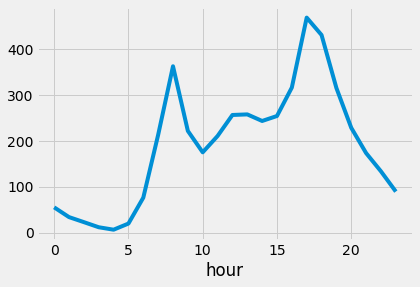

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

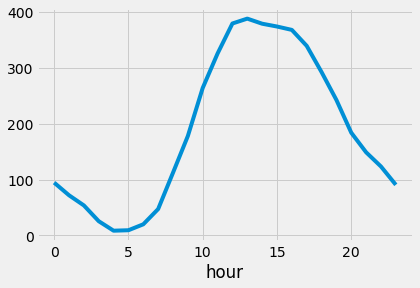

In [10]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes['workingday']==0].groupby('hour').total.mean().plot()

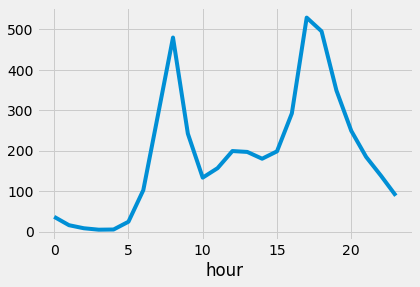

In [11]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes['workingday']==1].groupby('hour').total.mean().plot()

### Conclucion
- Se observa que en los dias feriados empieza la actividad de alquiler sobre la 5 am, llegando a encontrar un pico entre 11 y 12 del dia para empezar a descender y practicamente terminar sobre la media noches
- Por otro lado, para los dias laborales se evidencian 2 picos, uno sobre las 8 de la mañana y otro sobre las 5 de la tarde, encontrandose un valle entre las 10 y 16 horas
- Para ambos casos (feriado y dia laboral) las madrugadas evidencia una baja actividad, siendo mas marcada para los dias laborales

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Celda 3
X=bikes[['hour','workingday']]
y=bikes['total']
reg = LinearRegression().fit(X, y)

In [13]:
print('model',reg)
print('score:',reg.score(X, y))
print('coef:',reg.coef_)
print('intercept',reg.intercept_)

model LinearRegression()
score: 0.16059115011434855
coef: [10.49206282  4.07248627]
intercept 67.7059502619161


In [14]:
import statsmodels.api as sm

#add constant to predictor variables
X_constant = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X_constant).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:21:58   Log-Likelihood:                -71093.
No. Observations:               10886   AIC:                         1.422e+05
Df Residuals:                   10883   BIC:                         1.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7060      3.866     17.514      0.0

### Concluciones
- Un modelo de regresion lineal no representa el comportamiento del alquiler de bicicletas, posiblemente porque este comportamiento describa una funcion diferente por ejemplo polinomial
- Vemos que el R-squared apenas si logra explicar el 16% del comportamiento de los datos

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [17]:
# Definición de la función que calcula el RSS
def RSS(y):
    if y.shape[0] == 0:
        return 0
    else:
        return sum((y-y.mean())**2)

In [18]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def RSSNodo(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    #print('l:',y_l.shape[0],'r:',y_r.shape[0])
    #n_l = y_l.shape[0]
    #n_r = y_r.shape[0]
    
    ##gini_y = gini(y)
    RSS_l = RSS(y_l)
    RSS_r = RSS(y_r)
    #gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    _RSSNode=RSS_l+RSS_r
    
    return _RSSNode

In [19]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):

    features = range(X.shape[1])
    
    #_best_split = [0, 0, 0]  # j, split, gain
    _best_split=None 
    # Para todas las varibles 
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)
        for split in splits:
            gain = RSSNodo(X.iloc[:, j], y, split)
            if _best_split==None:
                _best_split = [j, split, gain]
            else:
                if gain < _best_split[2]:
                    _best_split = [j, split, gain]
    return _best_split

In [22]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    #print('level:',level)
    # Si solo es una observación
    if X.shape[0] <= 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, rss=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], rss=gain)
    # Revisar el criterio de parada 
    #if gain < min_gain:
    #    return tree
    #print('level',level,max_depth)
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    #print('l:',X_l.shape[0],y_l.shape[0])
    #print('r:',X_r.shape[0],y_r.shape[0])
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    
    return tree

In [23]:
# Celda 4
tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 1,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'rss': 257735770.9200565,
 'sl': {'y_pred': 1,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'rss': 16421774.453006309,
  'sl': {'y_pred': 1,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'rss': 3899135.625447494,
   'sl': {'y_pred': 1,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'rss': 2024744.7766305662},
   'sr': {'y_pred': 1,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'rss': 686888.6350389324}},
  'sr': {'y_pred': 1,
   'level': 2,
   'split': [1, 1.0],
   'n_samples': 455,
   'rss': 5653714.781312574,
   'sl': {'y_pred': 1,
    'level': 3,
    'split': -1,
    'n_samples': 145,
    'rss': 274236.5103448276},
   'sr': {'y_pred': 1,
    'level': 3,
    'split': -1,
    'n_samples': 310,
    'rss': 5379478.270967746}}},
 'sr': {'y_pred': 1,
  'level': 1,
  'split': [0, 21.0],
  'n_samples': 7292,
  'rss': 201407169.17288497,
  'sl': {'y_pred': 1,
   'level'

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [24]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
dt_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    #clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    #accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())
    
    dt = DecisionTreeRegressor(random_state=0, criterion="mae",max_depth=depth)
    dt_fit = dt.fit(XTrain, yTrain)
    dt_scores.append(np.mean(cross_val_score(dt_fit, XTrain, yTrain, cv = 10)))


Text(0, 0.5, 'mae')

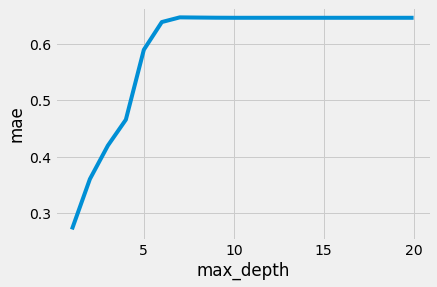

In [26]:
# Gráfica max_depth versus MAE (error del modelo)
plt.plot(max_depth_range, dt_scores)
plt.xlabel('max_depth')
plt.ylabel('mae')

In [27]:
sorted(zip(dt_scores, max_depth_range))[::-1][0]

(0.6476221079995227, 7)

In [28]:
# Se ajusta max_depth con el valor optimo del accuracy
max_depth=sorted(zip(dt_scores, max_depth_range))[::-1][0][0]
clf = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=0.6476221079995227, random_state=1)

In [29]:
predicciones=clf.predict(XTest)
MSE=np.average(np.square(predicciones-yTest))
print('MSE:',MSE)

MSE: 32483.03288896667


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [30]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [31]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [32]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

#### Arbol de decision

In [33]:
import seaborn as sns
classes=['Popular','No Popular']
y_train.value_counts()
accuracy=[]
f1=[]

In [34]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [35]:
def roc_curve(y_test,prediccionesProb):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionesProb[:,1], pos_label=1)
    AUC=metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % AUC)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [36]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

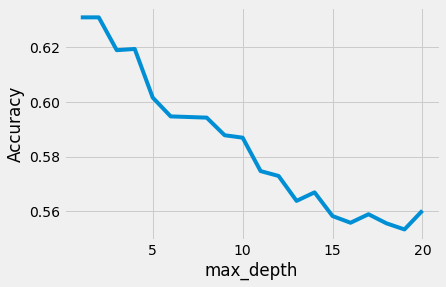

In [37]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [38]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print("Accuracy")
sorted(zip(accuracy_scores, max_depth_range))[::-1][0][0]

Accuracy


0.6308888888888888

In [39]:
depth=sorted(zip(accuracy_scores, max_depth_range))[::-1][0][1]
clf = DecisionTreeClassifier(max_depth=depth, random_state=1)

In [40]:
clf.fit( X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [41]:
predicciones=clf.predict(X_test)
prediccionesProb=clf.predict_proba(X_test)

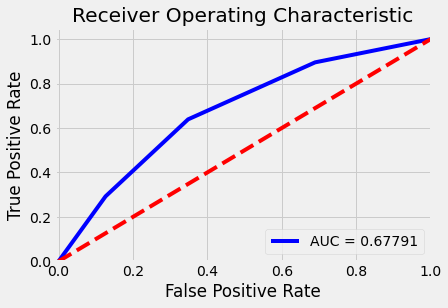

In [42]:
roc_curve(y_test,prediccionesProb)

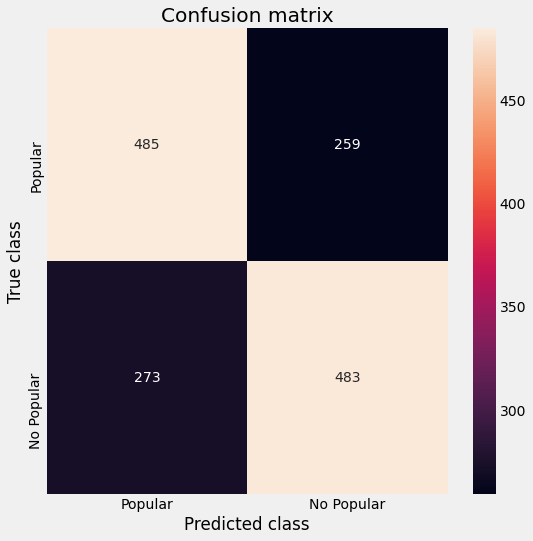

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       744
           1       0.65      0.64      0.64       756

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.65      0.65      0.65      1500

F1 Score: 0.6448598130841121


In [43]:
mostrar_resultados(y_test, predicciones)
_f1=f1_score(y_test, predicciones)
_accuracy=accuracy_score(y_test, predicciones)
print('F1 Score:',_f1)
f1.append(_f1)
accuracy.append(_accuracy)

### Ajustando Parametros del Arbol de decision

In [44]:
criterion="entropy"
max_features="log2"

In [45]:
clf = DecisionTreeClassifier(max_depth=depth, random_state=1,criterion=criterion,max_features=max_features)

In [46]:
clf.fit( X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='log2',
                       random_state=1)

In [47]:
predicciones=clf.predict(X_test)
prediccionesProb=clf.predict_proba(X_test)

In [48]:
print("Accuracy")
cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()

Accuracy


0.5613333333333335

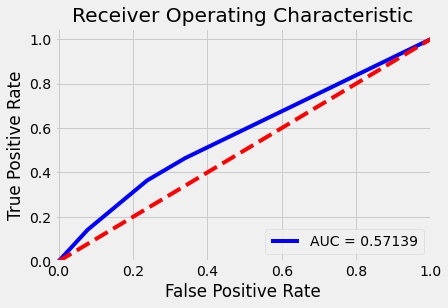

In [49]:
roc_curve(y_test,prediccionesProb)

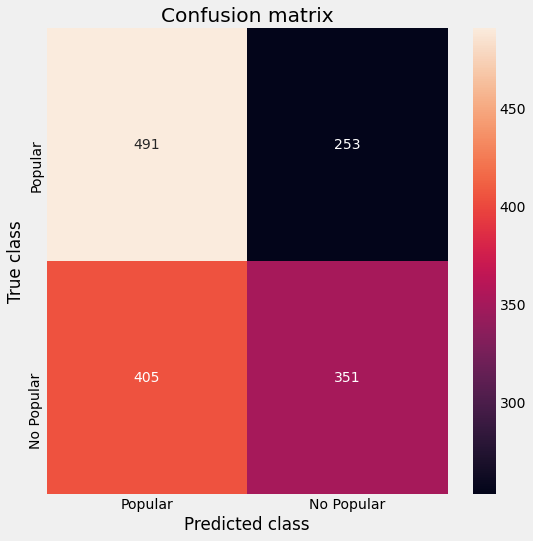

              precision    recall  f1-score   support

           0       0.55      0.66      0.60       744
           1       0.58      0.46      0.52       756

    accuracy                           0.56      1500
   macro avg       0.56      0.56      0.56      1500
weighted avg       0.56      0.56      0.56      1500

F1 Score: 0.5161764705882353


In [50]:
mostrar_resultados(y_test, predicciones)
_f1=f1_score(y_test, predicciones)
_accuracy=accuracy_score(y_test, predicciones)
print('F1 Score:',_f1)
f1.append(_f1)
accuracy.append(_accuracy)

#### Regresion logistica

In [51]:
clf = LogisticRegression(random_state=0).fit( X_train, y_train)
predicciones=clf.predict(X_test)
prediccionesProb=clf.predict_proba(X_test)
clf.score( X_train, y_train)

0.6144444444444445

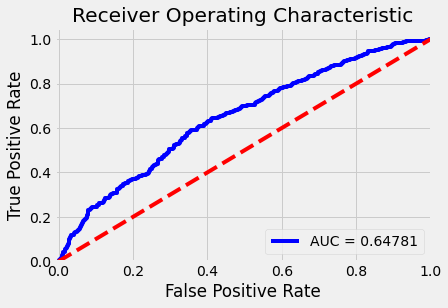

In [52]:
roc_curve(y_test,prediccionesProb)

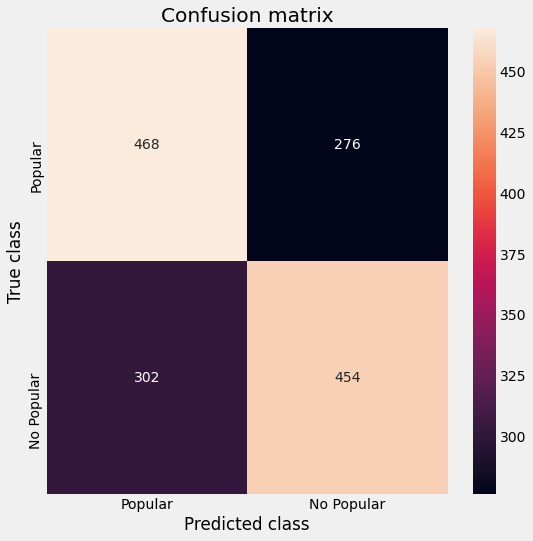

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       744
           1       0.62      0.60      0.61       756

    accuracy                           0.61      1500
   macro avg       0.61      0.61      0.61      1500
weighted avg       0.61      0.61      0.61      1500

F1 Score: 0.6110363391655451


In [53]:
mostrar_resultados(y_test, predicciones)
_f1=f1_score(y_test, predicciones)
_accuracy=accuracy_score(y_test, predicciones)
print('F1 Score:',_f1)
f1.append(_f1)
accuracy.append(_accuracy)

### Comparacion resultados

In [54]:
plt.rcParams["figure.figsize"] = (8,6)
print(accuracy)
print(f1)

[0.6453333333333333, 0.5613333333333334, 0.6146666666666667]
[0.6448598130841121, 0.5161764705882353, 0.6110363391655451]


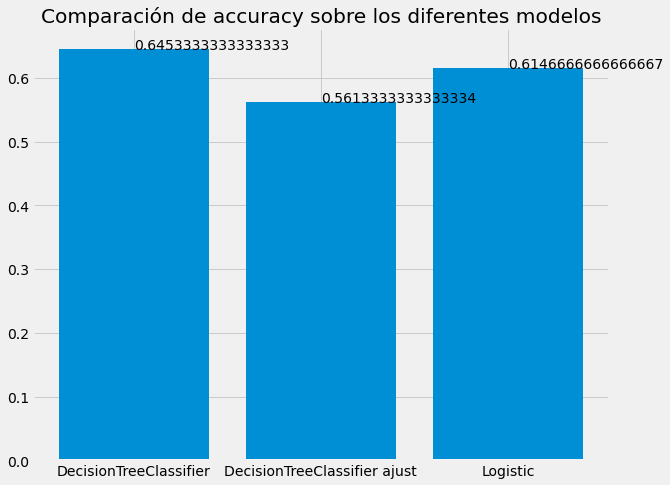

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de accuracy sobre los diferentes modelos")
ejeX = ['DecisionTreeClassifier','DecisionTreeClassifier ajust','Logistic']
ejeY = accuracy
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

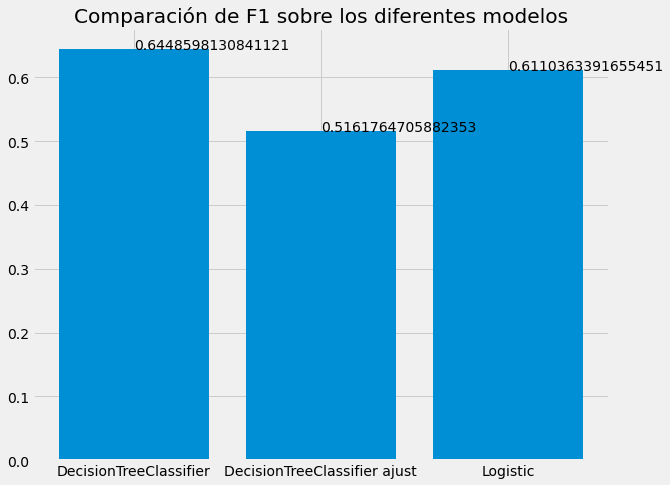

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de F1 sobre los diferentes modelos")
ejeX = ['DecisionTreeClassifier','DecisionTreeClassifier ajust','Logistic']
ejeY = f1
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [57]:
f1=[]
accuracy=[]

### 100 árboles de decisión donde max_depth = None

In [58]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True,max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

### 100 árboles de decisión donde  max_depth = 2

In [59]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True,max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

### 100 regresiones logísticas

In [60]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True,max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

### Evaluacion de resultados

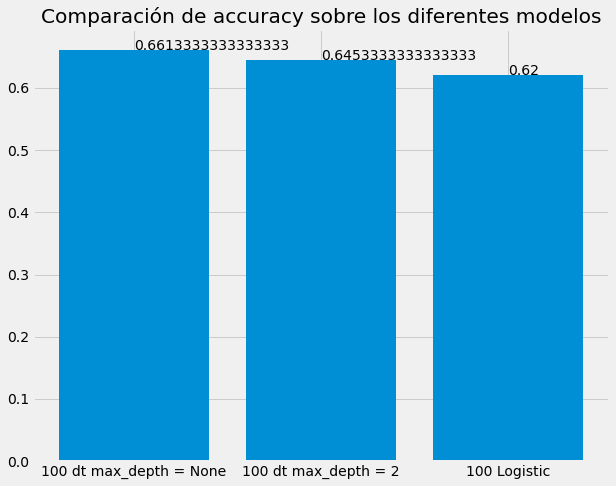

In [61]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de accuracy sobre los diferentes modelos")
ejeX = ['100 dt max_depth = None','100 dt max_depth = 2','100 Logistic']
ejeY = accuracy
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

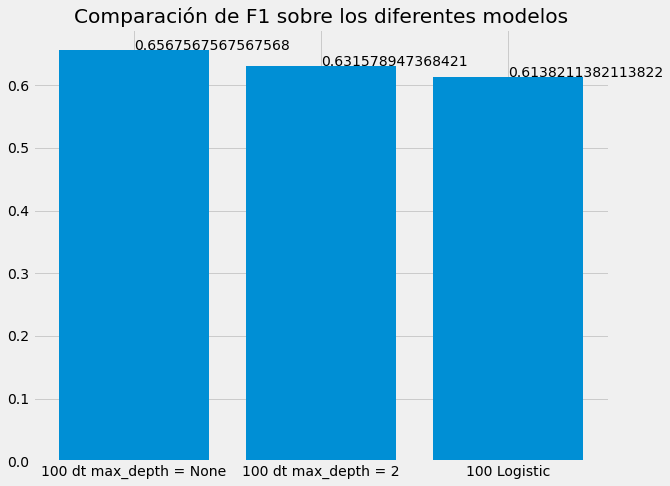

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de F1 sobre los diferentes modelos")
ejeX = ['100 dt max_depth = None','100 dt max_depth = 2','100 Logistic']
ejeY = f1
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [63]:
f1=[]
accuracy=[]

### 100 árboles de decisión donde max_depth = None

In [64]:
# Celda 8
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True,max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

In [65]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [66]:
# Desempeño al hacer votación ponderada
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

### 100 árboles de decisión donde  max_depth = 2

In [67]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True,max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

In [68]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [69]:
# Desempeño al hacer votación ponderada
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

### 100 regresiones logísticas

In [70]:
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True,max_samples=300)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

In [71]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [72]:
# Desempeño al hacer votación ponderada
f1.append(metrics.f1_score(y_pred, y_test))
accuracy.append(metrics.accuracy_score(y_pred, y_test))

### Evaluacion de resultados

In [73]:
plt.rcParams["figure.figsize"] = (8,6)
accuracy[0]

0.6613333333333333

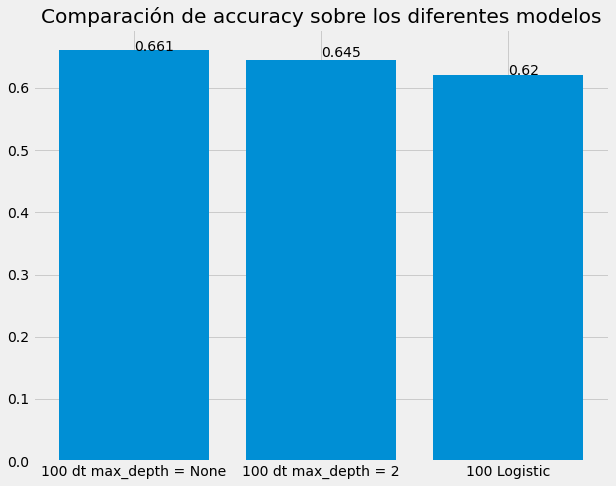

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de accuracy sobre los diferentes modelos")
ejeX = ['100 dt max_depth = None','100 dt max_depth = 2','100 Logistic']
ejeY = [accuracy[0],accuracy[2],accuracy[4]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i],2),round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

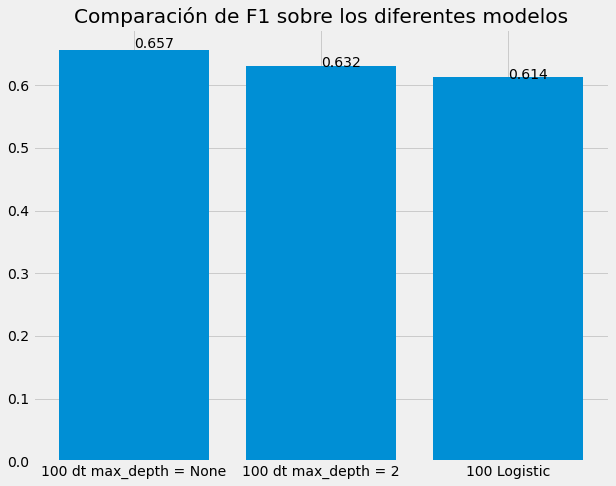

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de F1 sobre los diferentes modelos")
ejeX = ['100 dt max_depth = None','100 dt max_depth = 2','100 Logistic']
ejeY = [f1[0],f1[2],f1[4]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i],2),round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [80]:
plt.rcParams["figure.figsize"] = (16,4)

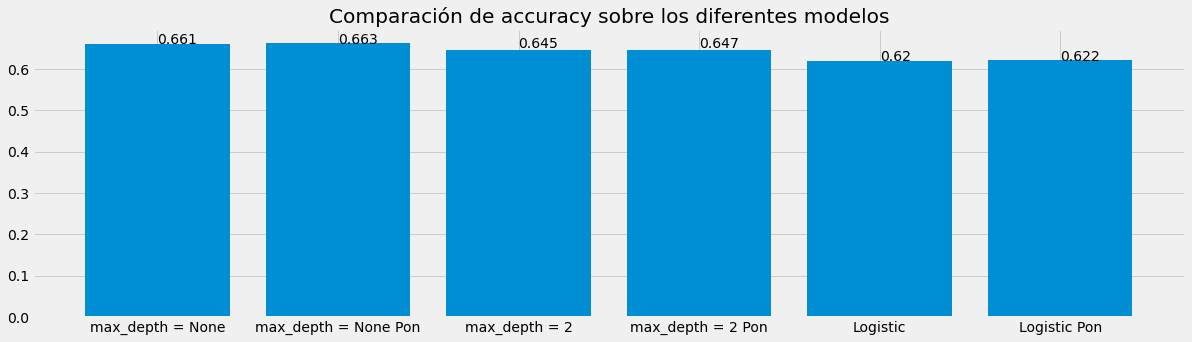

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de accuracy sobre los diferentes modelos")
ejeX = ['max_depth = None','max_depth = None Pon','max_depth = 2',\
        'max_depth = 2 Pon','Logistic','Logistic Pon']
ejeY = accuracy
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i],2),round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

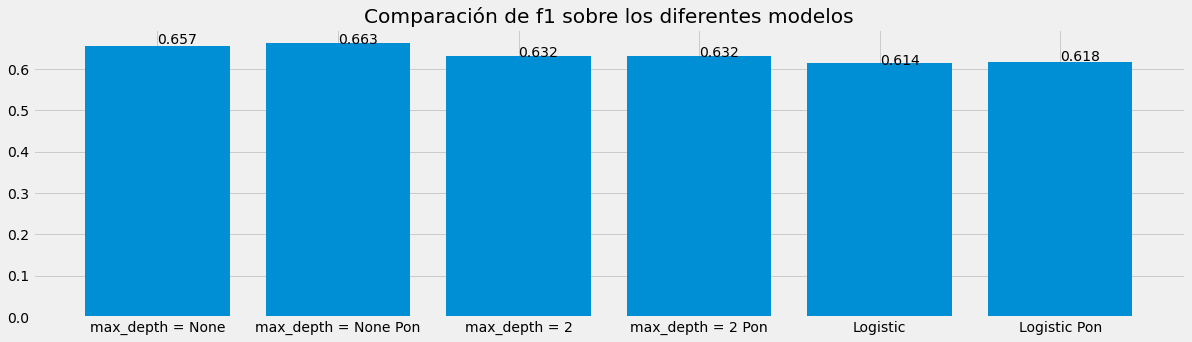

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de f1 sobre los diferentes modelos")
ejeX = ['max_depth = None','max_depth = None Pon','max_depth = 2',\
        'max_depth = 2 Pon','Logistic','Logistic Pon']
ejeY = f1
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i],2),round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

### Celda 9
- Para los metodos de votacion mayoritaria y votacion ponderada, se evidencia una sutil mejora en este ultimo.
- En el metodo de votacion mayoritaria no hay pesos de forma predeterminada
- En el metodo de votacion ponderada se implementan metacaracteristicas para ampliar su capacidad de prediccion